# Data Set Transformation

## Going from the original data to finding clusters from principle components of a new data set

## Data Source  
Dr Daqing Chen, Director: Public Analytics group. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK.

## Packages/Modules Used

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from dotenv import load_dotenv
load_dotenv()

True

## Data Processing

In [2]:
online_retail_data = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Online_Retail.csv", encoding='latin1')
online_retail_data.head(n=10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
customer_data = online_retail_data.dropna(subset=['CustomerID'])
customer_data = customer_data.astype({'CustomerID': int})
customer_data = customer_data.astype({'CustomerID': str})
customer_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047,United Kingdom


In [4]:
stock_codes = list(set(customer_data.StockCode.astype(str).values))
customers = list(set(customer_data.CustomerID.values))
countries = list(set(customer_data.Country.values))
stock_codes.sort()
customers.sort()
countries.sort()

for i, stock_code in enumerate(stock_codes):
    stock_codes[i] = stock_code.replace(' ', '_')
stock_codes = stock_codes[:-8]

for i, country in enumerate(countries):
    countries[i] = country.replace(' ', '_')

In [5]:
customer_df_outline = {}
customer_df_outline['CustomerID'] = customers
for country in countries:
    customer_df_outline[country] = 0
for stock_code in stock_codes:
    customer_df_outline[stock_code] = 0

In [6]:
quantities_of_purchases_by_customer = pd.DataFrame(customer_df_outline)
quantities_of_purchases_by_customer

,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel_Islands,Cyprus,Czech_Republic,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12347,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4368,18281,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4369,18282,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4370,18283,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
customer_countries = customer_data[['CustomerID', 'Country']].set_index(customer_data['CustomerID'])[['Country']].to_dict()['Country']
for customer_id, country in list(customer_countries.items()):
    quantities_of_purchases_by_customer.loc[quantities_of_purchases_by_customer['CustomerID'] == customer_id, country.replace(' ', '_')] = 1
quantities_of_purchases_by_customer

,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel_Islands,Cyprus,Czech_Republic,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12347,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4368,18281,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4369,18282,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4370,18283,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
customer_quantities_by_stockcode = customer_data[['CustomerID', 'StockCode', 'Quantity']].groupby(['CustomerID', 'StockCode']).sum().query('Quantity > 0').to_dict()
for customer_id, stock_code in list(customer_quantities_by_stockcode['Quantity'].keys()):
    if stock_code.replace(' ', '_') in stock_codes:
        quantities_of_purchases_by_customer.loc[quantities_of_purchases_by_customer['CustomerID'] == customer_id, stock_code.replace(' ', '_')] = customer_quantities_by_stockcode['Quantity'][(customer_id, stock_code)]
quantities_of_purchases_by_customer

,CustomerID,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel_Islands,Cyprus,Czech_Republic,...,90214O,90214P,90214R,90214S,90214T,90214U,90214V,90214W,90214Y,90214Z
0,12346,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12347,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12348,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12349,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12350,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4368,18281,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4369,18282,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4370,18283,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
quantities_of_purchases_by_customer = quantities_of_purchases_by_customer.set_index('CustomerID')

In [10]:
file_name = 'Customer_Purchases.csv'
quantities_of_purchases_by_customer.to_csv(f"{os.getenv('PROJ_REPOS')}\\data\\{file_name}")

In [11]:
quantities_of_purchases_by_customer = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Customer_Purchases.csv", encoding='latin1', index_col='CustomerID')
quantities_of_purchases_by_customer_norm = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Customer_Purchases.csv", encoding='latin1', index_col='CustomerID')

In [12]:
transformer = Normalizer()
quantities_of_purchases_by_customer_norm[stock_codes] = transformer.fit_transform(quantities_of_purchases_by_customer_norm[stock_codes])

In [13]:
file_name = 'Customer_Purchases_Norm.csv'
quantities_of_purchases_by_customer_norm.to_csv(f"{os.getenv('PROJ_REPOS')}\\data\\{file_name}")

## PCA and Clustering

In [7]:
online_retail_data = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Online_Retail.csv", encoding='latin1')
quantities_of_purchases_by_customer = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Customer_Purchases.csv", encoding='latin1', index_col='CustomerID')
quantities_of_purchases_by_customer_norm = pd.read_csv(f"{os.getenv('PROJ_REPOS')}\\data\\Customer_Purchases_Norm.csv", encoding='latin1', index_col='CustomerID')

In [8]:
pca_2d = PCA(n_components=2)
principle_components_2d = pca_2d.fit_transform(quantities_of_purchases_by_customer_norm)
principle_2d_df = pd.DataFrame(data=principle_components_2d, columns=['pc1', 'pc2'])
principle_2d_df = principle_2d_df.set_index(quantities_of_purchases_by_customer_norm.index)
principle_2d_df

,pc1,pc2
CustomerID,,
12346,-0.100317,-0.004102
12347,0.861475,0.062584
12348,0.860436,0.031020
12349,0.884623,0.005075
12350,0.859357,0.036472
...,...,...
18280,-0.098861,-0.002990
18281,-0.091887,0.003002
18282,-0.099382,-0.001603


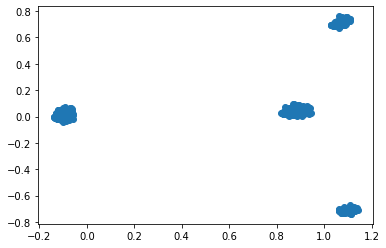

In [9]:
plt.scatter(principle_2d_df.pc1, principle_2d_df.pc2)
plt.show()

In [10]:
pca_3d = PCA(n_components=3)
principle_components_3d = pca_3d.fit_transform(quantities_of_purchases_by_customer_norm)
principle_3d_df = pd.DataFrame(data=principle_components_3d, columns=['pc1', 'pc2', 'pc3'])
principle_3d_df = principle_3d_df.set_index(quantities_of_purchases_by_customer_norm.index)
principle_3d_df

,pc1,pc2,pc3
CustomerID,,,
12346,-0.100317,-0.004098,-0.035475
12347,0.861475,0.062580,0.036560
12348,0.860436,0.031037,0.007768
12349,0.884623,0.005138,-0.066019
12350,0.859357,0.036490,-0.035909
...,...,...,...
18280,-0.098861,-0.002986,-0.031223
18281,-0.091887,0.003012,-0.005101
18282,-0.099382,-0.001603,-0.033930


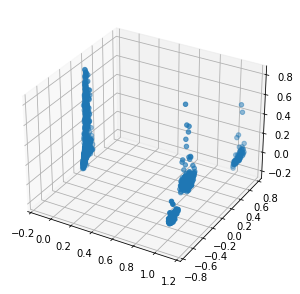

In [11]:
fig = plt.figure(figsize = (5, 5))
ax = plt.axes(projection ="3d")
ax.scatter3D(principle_3d_df.pc1, principle_3d_df.pc2, principle_3d_df.pc3)
plt.show()

In [12]:
clustering_model = Birch(threshold=0.01, n_clusters=4)
clustering_model.fit(principle_2d_df)
predictions = clustering_model.predict(principle_2d_df)
clusters = np.unique(predictions)

In [13]:
principle_2d_df['Cluster'] = predictions
principle_2d_df

,pc1,pc2,Cluster
CustomerID,,,
12346,-0.100317,-0.004102,3
12347,0.861475,0.062584,0
12348,0.860436,0.031020,0
12349,0.884623,0.005075,0
12350,0.859357,0.036472,0
...,...,...,...
18280,-0.098861,-0.002990,3
18281,-0.091887,0.003002,3
18282,-0.099382,-0.001603,3


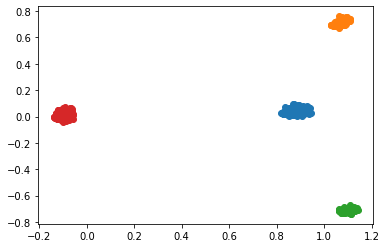

In [14]:
for cluster in clusters:
	pc1_cluster_n = principle_2d_df.query(f"Cluster == {cluster}").pc1
	pc2_cluster_n = principle_2d_df.query(f"Cluster == {cluster}").pc2
	plt.scatter(pc1_cluster_n, pc2_cluster_n)
# show the plot
plt.show()

In [21]:
customers_clustered = principle_2d_df[['Cluster']].join(quantities_of_purchases_by_customer)
customers_clustered_norm = principle_2d_df[['Cluster']].join(quantities_of_purchases_by_customer_norm)

In [22]:
file_name = 'Customer_Purchases_Clusters.csv'
customers_clustered.to_csv(f"{os.getenv('PROJ_REPOS')}\\data\\{file_name}")

In [26]:
file_name = 'Customer_Purchases_Clusters_Norm.csv'
customers_clustered_norm.to_csv(f"{os.getenv('PROJ_REPOS')}\\data\\{file_name}")